### Importing and Understanding Data

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
# Importing Housing.csv
housing = pd.read_csv('newhousing.csv')

In [53]:
# Looking at the first five rows
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,5250000,5500,3,2,1,1,0,1,0,0,0,0,1,0,1833.333333,0.666667
1,4480000,4040,3,1,2,1,0,0,0,0,1,0,1,0,1346.666667,0.333333
2,3570000,3640,2,1,1,1,0,0,0,0,0,0,0,1,1820.000000,0.500000
3,2870000,3040,2,1,1,0,0,0,0,0,0,0,0,1,1520.000000,0.500000
4,3570000,4500,2,1,1,0,0,0,0,0,0,0,0,0,2250.000000,0.500000


In [54]:
housing.shape

(545, 16)

In [55]:
# What type of values are stored in the columns?
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            545 non-null    int64  
 1   area             545 non-null    int64  
 2   bedrooms         545 non-null    int64  
 3   bathrooms        545 non-null    int64  
 4   stories          545 non-null    int64  
 5   mainroad         545 non-null    int64  
 6   guestroom        545 non-null    int64  
 7   basement         545 non-null    int64  
 8   hotwaterheating  545 non-null    int64  
 9   airconditioning  545 non-null    int64  
 10  parking          545 non-null    int64  
 11  prefarea         545 non-null    int64  
 12  semi-furnished   545 non-null    int64  
 13  unfurnished      545 non-null    int64  
 14  areaperbedroom   545 non-null    float64
 15  bbratio          545 non-null    float64
dtypes: float64(2), int64(14)
memory usage: 68.2 KB


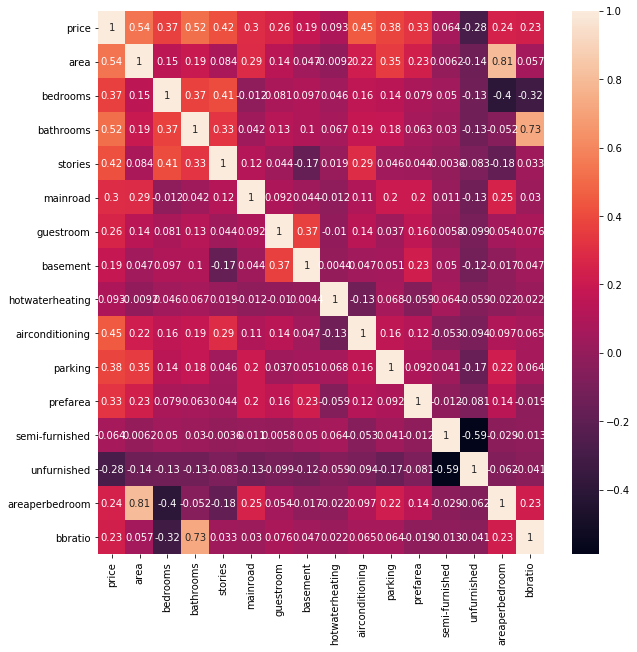

In [56]:
plt.figure(figsize=[10,10])
sns.heatmap(housing.corr(), annot=True)
plt.show()

## Splitting Data into Training and Testing Sets

In [57]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio'],
      dtype='object')

In [58]:
# Putting feature variable to X
X = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio']]

# Putting response variable to y
y = housing['price']

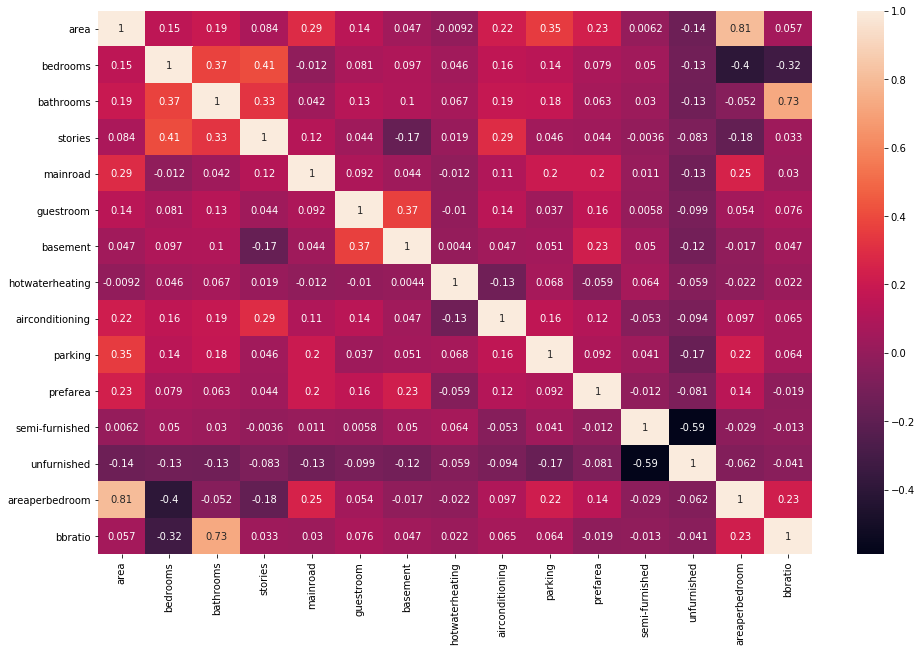

In [59]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(X.corr(),annot = True)

In [60]:
#creating correlation matrix for the given data
corrmat = np.corrcoef(X.transpose())

In [61]:
#Make a diagonal matrix with diagonal entry of Matrix corrmat
p=np.diagflat(corrmat.diagonal())

In [62]:
# subtract diagonal entries making all diagonals 0
corrmat_diag_zero = corrmat - p
print("max corr:",corrmat_diag_zero.max(), ", min corr: ", corrmat_diag_zero.min(),)


max corr: 0.8056104195904634 , min corr:  -0.5884049771343838


### Question No. 1 and 2

In [46]:
# Retrieve the (i,j) index for which matrix has maximum value

ij_max = np.unravel_index(
#                 ## add code to solve for Question 1 and Question 2
)
print("ij_max is",ij_max)
print("Maximum correlation :",corrmat_diag_zero[ij_max])

TypeError: unravel_index() missing 1 required positional argument: 'indices'

In [63]:
import matplotlib.pyplot as plt
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import explained_variance_score
#Importing the PCA module
from sklearn.decomposition import PCA

In [64]:
 pca = PCA(n_components=6,random_state=100)

In [94]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

from sklearn import preprocessing
X_scaler = preprocessing.StandardScaler().fit(X_train)
y_scaler = preprocessing.StandardScaler().fit(y_train.values.reshape(-1,1))
Xtrain=X_scaler.transform(X_train) 
ytrain=y_scaler.transform(y_train.values.reshape(-1,1)) 

Xtest=X_scaler.transform(X_test) 
ytest=y_scaler.transform(y_test.values.reshape(-1,1))

In [95]:
Xtrain = pd.DataFrame(Xtrain)
Xtrain.columns = X_train.columns

In [96]:
Xtrain.describe()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
count,3.810000e+02,3.810000e+02,3.810000e+02,3.810000e+02,3.810000e+02,3.810000e+02,3.810000e+02,3.810000e+02,3.810000e+02,3.810000e+02,3.810000e+02,3.810000e+02,3.810000e+02,3.810000e+02,3.810000e+02
mean,-1.567717e-16,-2.913971e-17,-2.564295e-17,6.527295e-17,3.700743e-17,1.165588e-17,-1.171416e-16,-7.736594e-17,1.620168e-16,-1.054858e-16,-2.331177e-17,2.103887e-16,-1.573544e-17,1.046116e-16,-2.913971e-17
std,1.001315e+00,1.001315e+00,1.001315e+00,1.001315e+00,1.001315e+00,1.001315e+00,1.001315e+00,1.001315e+00,1.001315e+00,1.001315e+00,1.001315e+00,1.001315e+00,1.001315e+00,1.001315e+00,1.001315e+00
min,-1.587334e+00,-2.682951e+00,-5.308788e-01,-9.372135e-01,-2.359866e+00,-4.323377e-01,-7.029350e-01,-2.226809e-01,-6.534266e-01,-8.102059e-01,-5.439838e-01,-8.462956e-01,-7.071068e-01,-1.754274e+00,-1.751949e+00
25%,-7.424997e-01,-1.318192e+00,-5.308788e-01,-9.372135e-01,4.237530e-01,-4.323377e-01,-7.029350e-01,-2.226809e-01,-6.534266e-01,-8.102059e-01,-5.439838e-01,-8.462956e-01,-7.071068e-01,-7.397143e-01,-6.718638e-01
50%,-2.365030e-01,4.656657e-02,-5.308788e-01,2.259081e-01,4.237530e-01,-4.323377e-01,-7.029350e-01,-2.226809e-01,-6.534266e-01,-8.102059e-01,-5.439838e-01,-8.462956e-01,-7.071068e-01,-1.562510e-01,-6.718638e-01
75%,5.405635e-01,4.656657e-02,-5.308788e-01,2.259081e-01,4.237530e-01,-4.323377e-01,1.422607e+00,-2.226809e-01,1.530394e+00,3.246781e-01,-5.439838e-01,1.181620e+00,1.414214e+00,5.117251e-01,4.082210e-01
max,4.986107e+00,4.140843e+00,5.598358e+00,2.552151e+00,4.237530e-01,2.313007e+00,1.422607e+00,4.490731e+00,1.530394e+00,2.594446e+00,1.838290e+00,1.181620e+00,1.414214e+00,4.735333e+00,3.648475e+00


### Question No. 4

In [99]:
pca = PCA(random_state=100)

#Scale and transform data to get Principal Components

## add code for question no. 4
# fit_transform and transform to get the reduced data
Xtrain_reduced = pca.fit_transform(Xtrain)
Xtest_reduced = pca.transform(Xtest)


regrpca = linear_model.LinearRegression()
# Train the model using the principal components of the transformed training sets
regrpca.fit(Xtrain_reduced, ytrain)
# Make predictions using the principal components of the transformed testing set
y_pred = regrpca.predict(Xtest_reduced)
print("Mean squared error: %.2f" % mean_squared_error(ytest, y_pred))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(ytest, y_pred))


Mean squared error: 0.35
R2 score: 0.65


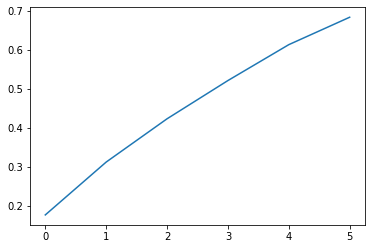

In [98]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [74]:
components = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'Feature':X.columns })
components

,PC1,PC2,Feature
0,0.466911,0.253614,area
1,0.131123,-0.501994,bedrooms
2,0.320620,-0.322073,bathrooms
3,0.181371,-0.391036,stories
4,0.298975,0.132957,mainroad
5,0.202099,-0.060133,guestroom
6,0.149324,-0.043661,basement
7,0.004933,-0.122714,hotwaterheating
8,0.257295,-0.113094,airconditioning
9,0.332199,0.046879,parking


In [78]:
pca.explained_variance_ratio_

array([0.17657495, 0.13563483, 0.1110914 , 0.09817563, 0.0921252 ,
       0.07037984])

In [79]:
pca80 = PCA(0.8)

In [80]:
Xtrain = pca80.fit_transform(Xtrain)

In [81]:
pca80.explained_variance_ratio_

array([0.17657495, 0.13563483, 0.1110914 , 0.09817563, 0.0921252 ,
       0.07037984, 0.06221571, 0.05705166])

In [87]:
cumsum = np.cumsum(pca80.explained_variance_ratio_)

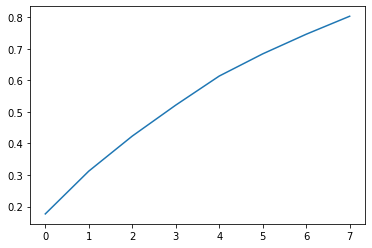

In [88]:
plt.plot(cumsum)

In [89]:
cumsum

array([0.17657495, 0.31220978, 0.42330118, 0.52147681, 0.613602  ,
       0.68398184, 0.74619755, 0.80324921])

In [90]:
pca = PCA(random_state=42)

In [91]:
pca.fit_transform(Xtrain)

array([[-1.89382742,  1.04859781,  1.12366889, ..., -0.13776709,
        -0.89418033,  1.63432386],
       [ 2.41706253,  0.75177319,  1.560377  , ...,  0.07819926,
        -0.99126558,  1.48178472],
       [ 1.61007146,  0.66810948, -1.0816004 , ..., -0.1871007 ,
         0.3742475 , -0.48598237],
       ...,
       [ 0.70040283,  1.37263147, -0.36736473, ...,  0.94392973,
        -1.5549132 ,  0.18021325],
       [ 0.8871212 , -1.01626729,  1.66713038, ...,  0.04288204,
        -0.88041681,  0.14007179],
       [ 2.20141726, -2.46443025,  1.02634462, ..., -0.77112415,
         0.47979133,  1.56875852]])

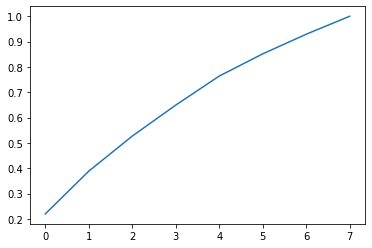

In [92]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [93]:
pca.explained_variance_ratio_

array([0.21982587, 0.16885771, 0.13830253, 0.12222312, 0.11469068,
       0.08761893, 0.07745505, 0.0710261 ])